Referencias:  
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial

In [1]:
import numpy as np
import pandas as pd
#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')


In [2]:
random_state = 2023
# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(random_state)

In [3]:
# Modelamiento
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [4]:
#Métricas y validación
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold, RepeatedKFold, learning_curve, ShuffleSplit
from collections import Counter
from sklearn.metrics import make_scorer, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [5]:
#Métricas de predicciones
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [6]:
import string

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import missingno as msno
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [7]:
#Modelos de discriminación
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### 2. EDA

In [3]:
#@title carga de datos en colab

# from google.colab import drive
# drive.mount('/content/drive')

# train_data = pd.read_csv('/content/drive/MyDrive/Kaggle/01. Titanic/train.csv')
# test_data = pd.read_csv(('/content/drive/MyDrive/Kaggle/01. Titanic/test.csv'))
# titanic = pd.concat([train_data, test_data], axis=0)
# titanic

In [130]:
# carga de datos local
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))
titanic = pd.concat([train_data, test_data], axis=0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
titanic.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [126]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   



In [131]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_data,2,["Age","SibSp","Parch","Fare"])

train_data.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [132]:
# Drop outliers
train = train_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

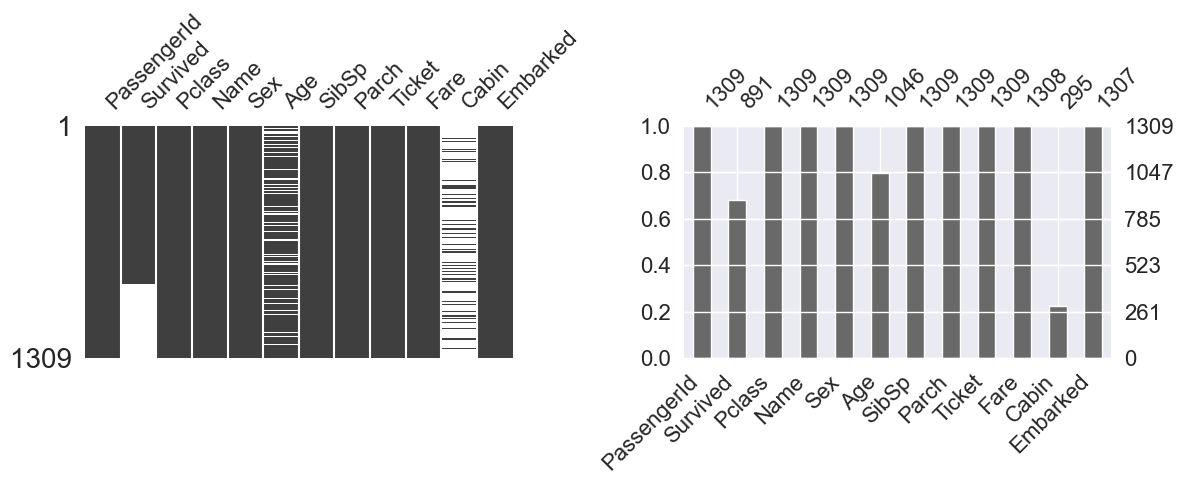

In [133]:
# Crea una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico 1 - msno.matrix
plt.subplot(1, 2, 1)
msno.matrix(titanic, ax=axes[0])

# Grafico 2 - msno.bar
plt.subplot(1, 2, 2)
msno.bar(titanic, ax=axes[1])

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


En el código proporcionado, las funciones `size()` y `unstack()` se utilizan para manipular y preparar los datos antes de trazar los gráficos.

1. `size()`: Esta función se aplica a un objeto de grupo generado por `groupby()` y devuelve el tamaño de cada grupo. En el código, se utiliza para calcular el tamaño de cada combinación de categorías en las columnas 'Embarked', 'Pclass' y 'Sex', junto con la columna 'Survived'. Esto proporciona el recuento de registros para cada combinación en el conjunto de datos.

2. `unstack()`: Esta función se aplica a un objeto de Serie o DataFrame y se utiliza para desapilar los niveles internos de un índice jerárquico, convirtiéndolo en un DataFrame más plano. En el código, se aplica después de `size()` para reorganizar los datos de manera que cada categoría de 'Survived' se convierte en una columna separada. Esto permite trazar gráficos de barras con las categorías 'Survived' en el eje x y los recuentos en el eje y.

En resumen, el código realiza los siguientes pasos para cada combinación de categorías en las columnas 'Embarked', 'Pclass' y 'Sex':
- Calcula el tamaño de cada grupo utilizando `size()`.
- Desapila los niveles del índice jerárquico utilizando `unstack()`.
- Genera un gráfico de barras para visualizar los recuentos de cada categoría de 'Survived' utilizando `plot(kind='bar')`.

El resultado es una matriz de tres gráficos de barras, donde cada gráfico muestra la distribución de supervivencia según la categoría especificada ('Embarked', 'Pclass' y 'Sex').

<AxesSubplot: xlabel='Sex'>

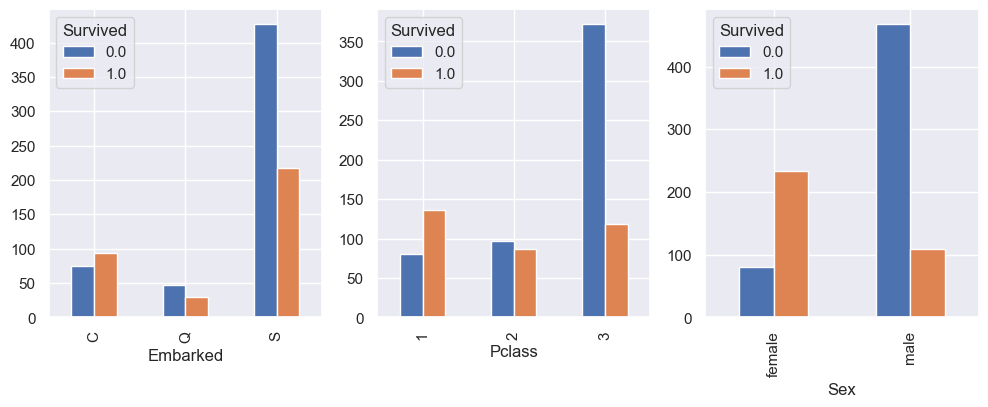

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

titanic.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', ax=axes[0])
titanic.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', ax=axes[1])
titanic.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=axes[2])

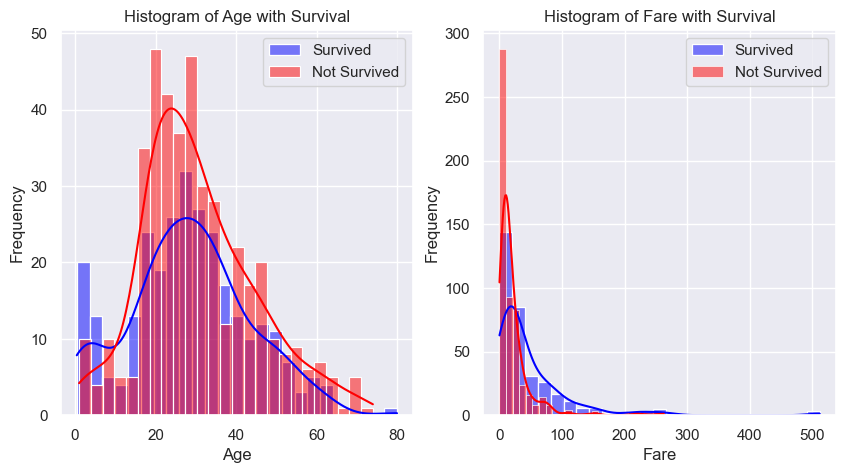

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

survived_data = titanic[titanic['Survived'] == 1]['Age']
not_survived_data = titanic[titanic['Survived'] == 0]['Age']

sns.histplot(survived_data, bins=25, color='blue', label='Survived', kde=True, ax=axes[0])
sns.histplot(not_survived_data, bins=25, color='red', label='Not Survived', kde=True, ax=axes[0])

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Age with Survival')
axes[0].legend()

survived_data = titanic[titanic['Survived'] == 1]['Fare']
not_survived_data = titanic[titanic['Survived'] == 0]['Fare']

sns.histplot(survived_data, bins=25, color='blue', label='Survived', kde=True, ax=axes[1])
sns.histplot(not_survived_data, bins=25, color='red', label='Not Survived', kde=True, ax=axes[1])

axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Fare with Survival')
axes[1].legend()

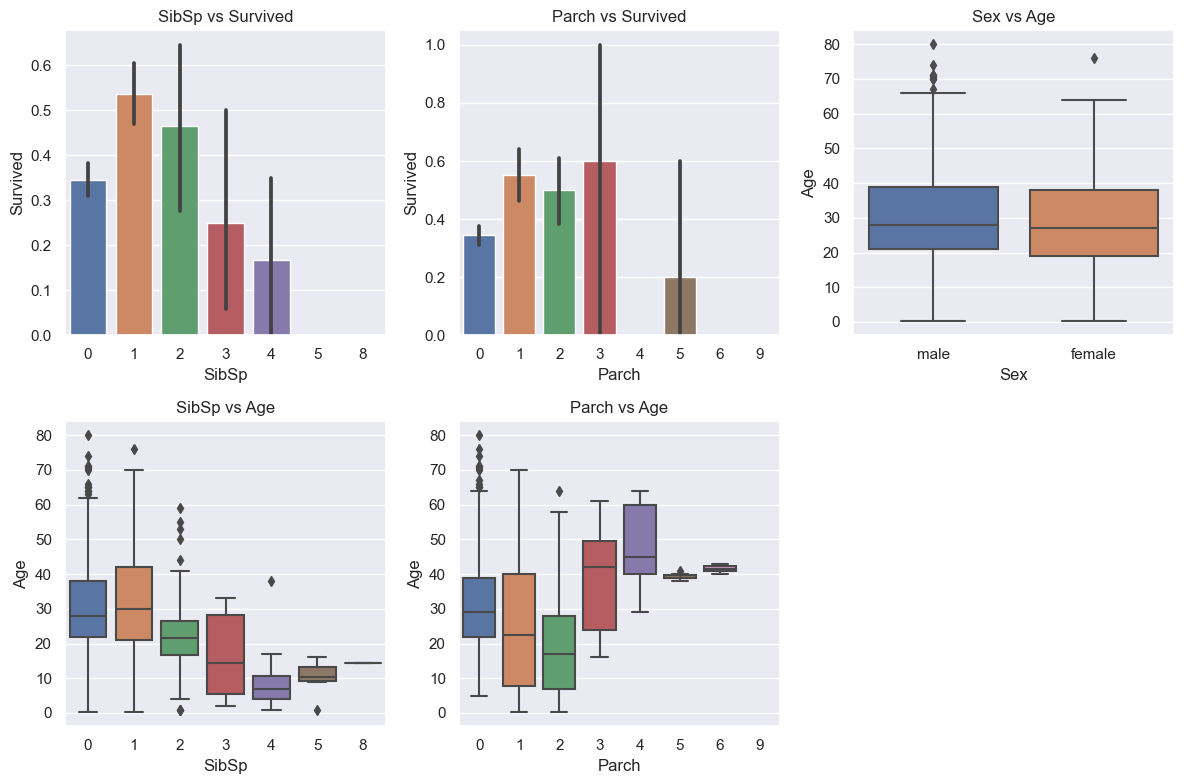

In [10]:
# Crea la estructura de subplots en una cuadrícula de 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Gráfico 1 - SibSp vs Survived (Barplot)
sns.barplot(data=titanic, x='SibSp', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title("SibSp vs Survived")

# Gráfico 2 - Parch vs Survived (Barplot)
sns.barplot(data=titanic, x='Parch', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title("Parch vs Survived")

# Gráfico 3 - Sex vs Age (Boxplot)
sns.boxplot(data=titanic, x='Sex', y='Age', ax=axes[0, 2])
axes[0, 2].set_title("Sex vs Age")

# Gráfico 4 - SibSp vs Age (Boxplot)
sns.boxplot(data=titanic, x='SibSp', y='Age', ax=axes[1, 0])
axes[1, 0].set_title("SibSp vs Age")

# Gráfico 5 - Parch vs Age (Boxplot)
sns.boxplot(data=titanic, x='Parch', y='Age', ax=axes[1, 1])
axes[1, 1].set_title("Parch vs Age")

# Elimina los subplots no utilizados
axes[1, 2].axis('off')

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


### 3. Feature Engineering

#### 3.1 Imputar mv de edad

In [134]:
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

#### 3.2 Embarked, se conoce que la persona abordó en Southampton

In [135]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [136]:
titanic['Embarked'].fillna("S", inplace=True)

#### 3.3 Hay un pasajero de tercera clase sin tarifa, se le imputa la tarifa promedio de la clase

In [137]:
titanic[titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [138]:
med_fare = titanic.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
titanic['Fare'] = titanic['Fare'].fillna(med_fare)

#### 3.4 Encontrar 'Deck' desde la variable cabina

![image.png](attachment:image.png)

In [139]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
titanic['Deck'] = titanic['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else "M")

Función para visualizar el % de pasajeros por clase en los distintos decks

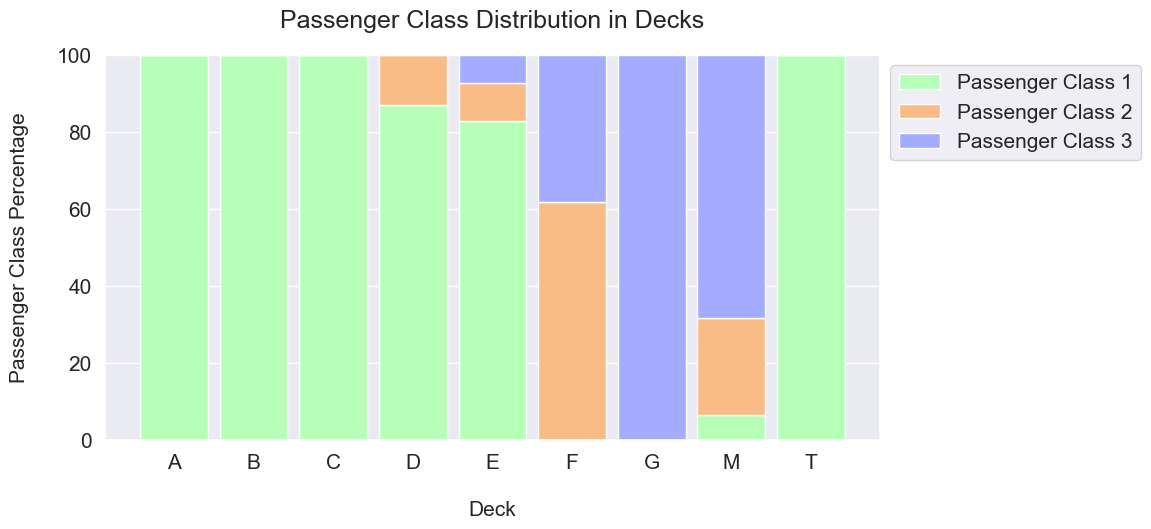

In [140]:
titanic_decks = titanic.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):

    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]

    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0

    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]

    return deck_counts, deck_percentages

def display_pclass_dist(percentages):

    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]

    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)

    plt.show()

all_deck_count, all_deck_per = get_pclass_dist(titanic_decks)
display_pclass_dist(all_deck_per)

Asignamos el único pasajero en el Deck T al Deck A, pues pertenece a la Clase 1

In [141]:
titanic.query('Deck == "T"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [142]:
# Passenger in the T deck is changed to A
titanic.loc[titanic[titanic['Deck'] == 'T'].index, 'Deck'] = 'A'

Función para visualizar el % de sobrevivencia en cada Deck

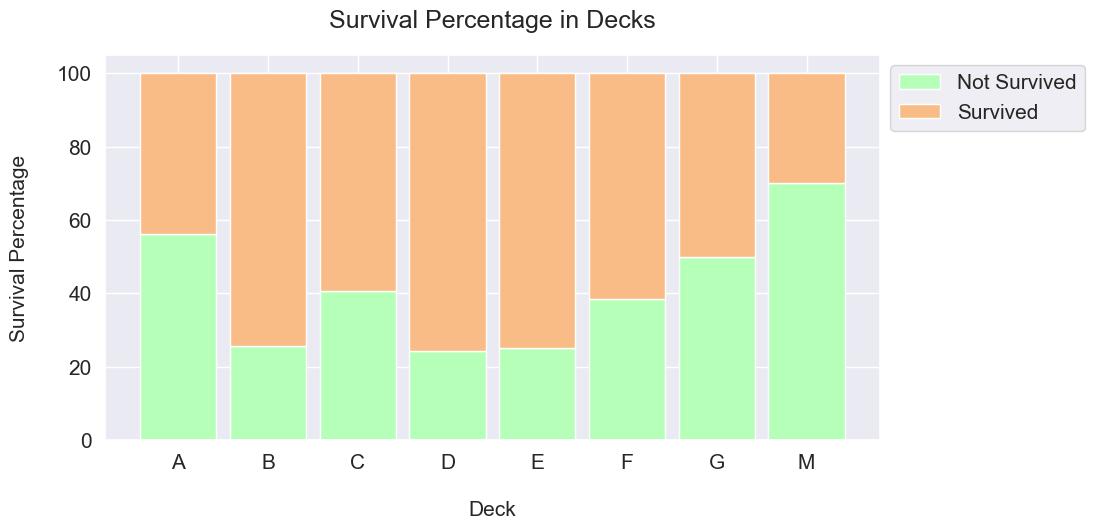

In [143]:
titanic_deck_surv = titanic.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):

    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]

    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]

    return surv_counts, surv_percentages

def display_surv_dist(percentages):

    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]

    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)

    plt.show()

all_surv_count, all_surv_per = get_survived_dist(titanic_deck_surv)
display_surv_dist(all_surv_per)

* **A**, **B** and **C** decks are labeled as **ABC** because all of them have only 1st class passengers
* **D** and **E** decks are labeled as **DE** because both of them have similar passenger class distribution and same survival rate
* **F** and **G** decks are labeled as **FG** because of the same reason above
* **M** deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [144]:
titanic['Deck'] = titanic['Deck'].replace(['A', 'B', 'C'], 'ABC')
titanic['Deck'] = titanic['Deck'].replace(['D', 'E'], 'DE')
titanic['Deck'] = titanic['Deck'].replace(['F', 'G'], 'FG')

titanic['Deck'].value_counts()

M      1013
ABC     183
DE       87
FG       26
Name: Deck, dtype: int64

#### 3.5 Discretizar Fare y Age

In [23]:
# titanic['Fare'] = pd.qcut(titanic['Fare'], 13)
# titanic['Age'] = pd.qcut(titanic['Age'], 10)

#### 3.6 Tamaño de la familia

In [145]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1

In [146]:
# Create new feature of family size
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
titanic['Family_Size_Grouped'] = titanic['Family_Size'].map(family_map)

Countplot del tamaño de la familia

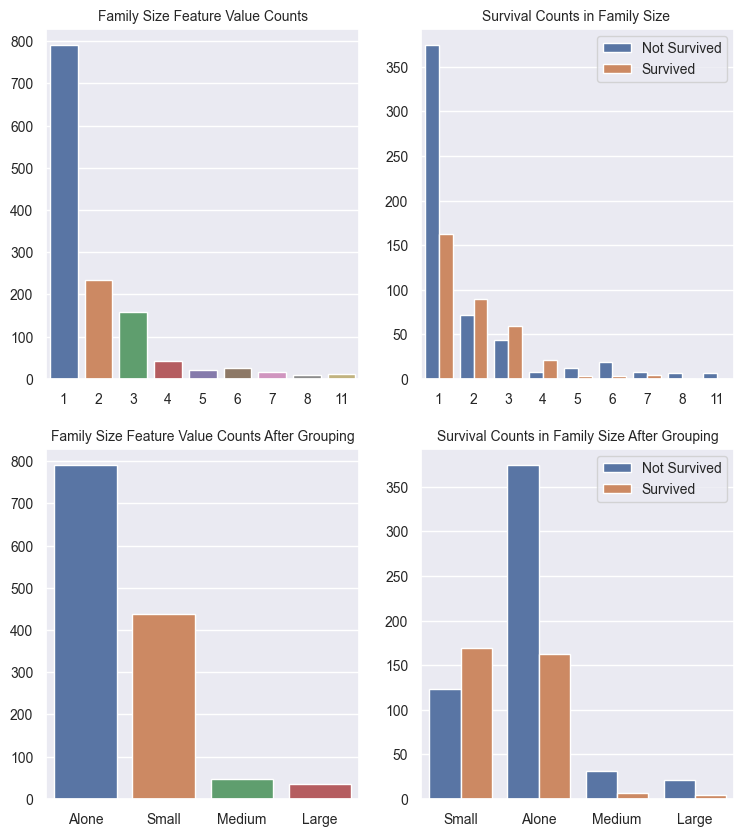

In [147]:
fig, axs = plt.subplots(figsize=(5, 10), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=titanic['Family_Size'].value_counts().index, y=titanic['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=titanic, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=10, y=1)
axs[0][1].set_title('Survival Counts in Family Size ', size=10, y=1)

sns.barplot(x=titanic['Family_Size_Grouped'].value_counts().index, y=titanic['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=titanic, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=10, y=1)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=10, y=1)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 10})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=10)
        axs[i][j].tick_params(axis='y', labelsize=10)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

#### 3.7 Frecuencia del Ticket
Da cuenta de las personas que compraron el ticket juntas pero no necesariamente son familia

In [148]:
titanic['Ticket_Frequency'] = titanic.groupby('Ticket')['Ticket'].transform('count')

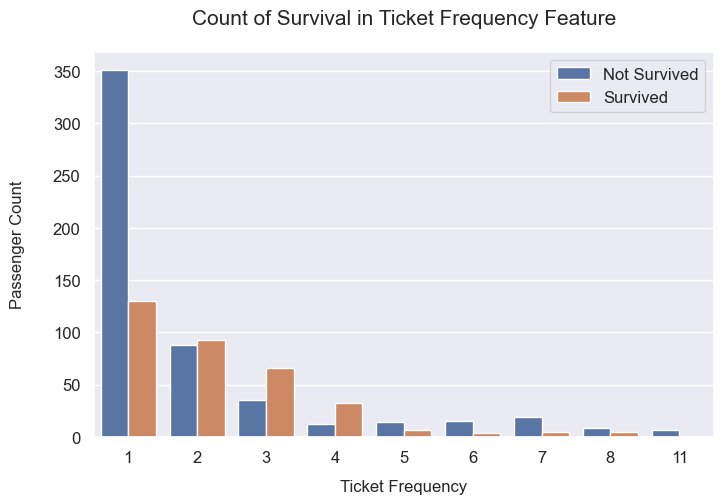

In [28]:
fig, axs = plt.subplots(figsize=(8, 5))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=titanic)

plt.xlabel('Ticket Frequency', size=12, labelpad=10)
plt.ylabel('Passenger Count', size=12, labelpad=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

#### 3.8 Título - está casada

Primero se identifican a las mujeres casadas.  
Luego se agrupan todos los títulos femeninos.  
Se identifican títulos de hombres, se destaca Master dado a hombres bajo 26 años

In [149]:
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
titanic['Is_Married'] = 0
titanic['Is_Married'].loc[titanic['Title'] == 'Mrs'] = 1

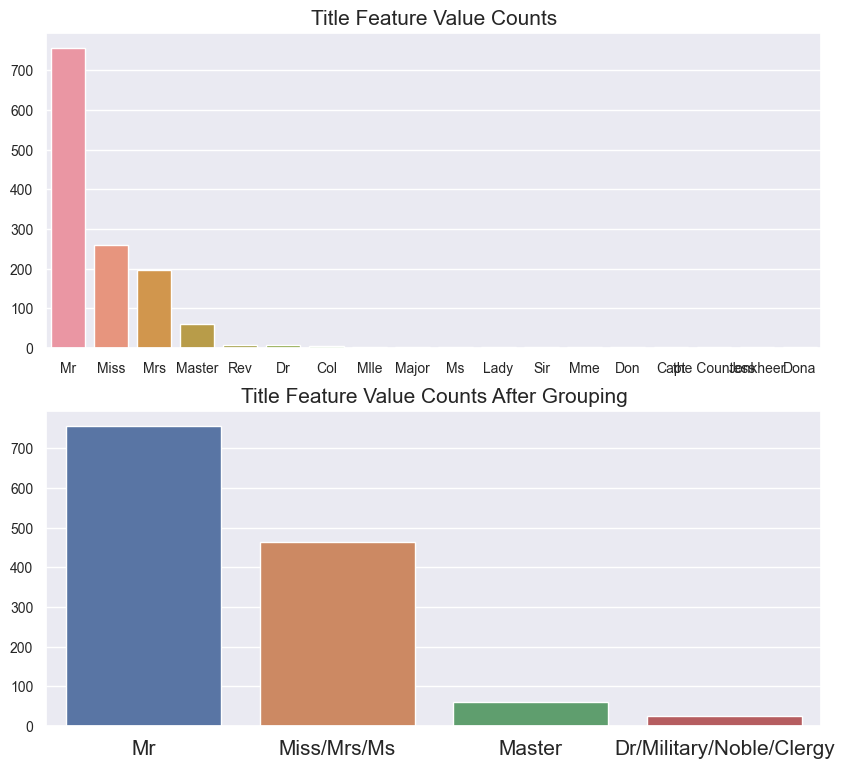

In [150]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 9))
sns.barplot(x=titanic['Title'].value_counts().index, y=titanic['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
    axs[i].tick_params(axis='y', labelsize=10)

axs[0].set_title('Title Feature Value Counts', size=15, y=1)

titanic['Title'] = titanic['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic['Title'] = titanic['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=titanic['Title'].value_counts().index, y=titanic['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=15, y=1)

plt.show()

#### 3.9 Encontrar el apellido

In [151]:
def extract_surname(data):

    families = []

    for i in range(len(data)):
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name

        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]

        for c in string.punctuation:
            family = family.replace(c, '').strip()

        families.append(family)

    return families

In [32]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,22.0,0,0,334915,7.7208,NaN,Q,M,1,Alone,1,Miss/Mrs/Ms,0
681,682,1.0,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C,DE,1,Alone,3,Mr,0
673,674,1.0,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S,M,1,Alone,1,Mr,0
727,728,1.0,3,"Mannion, Miss. Margareth",female,22.0,0,0,36866,7.7375,NaN,Q,M,1,Alone,1,Miss/Mrs/Ms,0
149,150,0.0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,M,1,Alone,1,Dr/Military/Noble/Clergy,0


In [152]:

titanic['Family'] = extract_surname(titanic['Name'])

In [34]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family
390,391,1.0,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,ABC,4,Small,4,Mr,0,Carter
354,355,0.0,3,"Yousif, Mr. Wazli",male,25.0,0,0,2647,7.2250,NaN,C,M,1,Alone,1,Mr,0,Yousif
385,1277,NaN,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0000,NaN,S,M,4,Small,5,Miss/Mrs/Ms,0,Herman
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S,M,5,Medium,5,Master,0,Palsson
292,1184,NaN,3,"Nasr, Mr. Mustafa",male,25.0,0,0,2652,7.2292,NaN,C,M,1,Alone,1,Mr,0,Nasr


titanic.sample(5)

#### 3.10 Nuevas features: Family survival rate, Ticket survival rate

Family_Survival_Rate is calculated from families in training set since there is no Survived feature in test set. A list of family names that are occuring in both training and test set (non_unique_families), is created. The survival rate is calculated for families with more than 1 members in that list, and stored in Family_Survival_Rate feature.

An extra binary feature Family_Survival_Rate_NA is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

Ticket_Survival_Rate and Ticket_Survival_Rate_NA features are also created with the same method.  
Ticket_Survival_Rate and Family_Survival_Rate are averaged and become Survival_Rate, and   
Ticket_Survival_Rate_NA and Family_Survival_Rate_NA are also averaged and become Survival_Rate_NA.

In [153]:
train = titanic[titanic['Survived'].notna()]
test = titanic[titanic['Survived'].isna()]

Crea una lista de familias que se encuentran en el train y test.  
Crea una lista de tickets que se encuentran en el train y test.  
Calcula una tasa de sobrevivencia en base al tamaño del gupo famliar.  
Lo hace para 'Family' y para 'Ticket'

In [154]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in train['Family'].unique() if x in test['Family'].unique()]
non_unique_tickets = [x for x in train['Ticket'].unique() if x in test['Ticket'].unique()]

df_family_survival_rate = train.groupby('Family')['Survived', 'Family', 'Family_Size'].median()
df_ticket_survival_rate = train.groupby('Ticket')['Survived', 'Ticket', 'Ticket_Frequency'].median()

In [155]:
df_family_survival_rate.head(3)

,Survived,Family_Size
Family,,
Abbing,0.0,1.0
Abbott,0.5,3.0
Abelson,0.5,2.0


In [156]:
df_ticket_survival_rate.sample(3)

,Survived,Ticket_Frequency
Ticket,,
371110,0.0,3.0
SOTON/OQ 392076,0.0,1.0
334912,0.0,1.0


In [157]:
family_rates = {}
ticket_rates = {}

# Checking a family exists in both training and test set, and has members more than 1
for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

# Checking a ticket exists in both training and test set, and has members more than 1
for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [158]:
mean_survival_rate = np.mean(train['Survived'])

Family survival rate

In [159]:
train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(train)):
    if train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)

for i in range(len(test)):
    if test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)

train['Family_Survival_Rate'] = train_family_survival_rate
train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test['Family_Survival_Rate'] = test_family_survival_rate
test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [160]:
test['Family_Survival_Rate'].head()

0    0.383838
1    0.383838
2    0.383838
3    0.383838
4    1.000000
Name: Family_Survival_Rate, dtype: float64

Ticket survival rate

In [161]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train)):
    if train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)

for i in range(len(test)):
    if test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)

train['Ticket_Survival_Rate'] = train_ticket_survival_rate
train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test['Ticket_Survival_Rate'] = test_ticket_survival_rate
test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

Overall Survival rate

In [162]:
for df in [train, test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2

### 4. Preprocesamiento

#### 4.1 LabelEncoding

In [163]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped','Is_Married']

for df in [train, test]:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

#### 4.2 OneHot Encoding

In [164]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped','Is_Married']
encoded_features = []

for df in [train, test]:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

In [165]:
train = pd.concat([train, *encoded_features[:7]], axis=1) #concatena las 6 primeras categorías codificadas
test = pd.concat([test, *encoded_features[7:]], axis=1) # contanena las 6 siguientes catergorias codificadas

#### 4.3 Eliminar features irrelevantes

In [51]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Family_Size',
       'Family_Size_Grouped', 'Ticket_Frequency', 'Title', 'Is_Married',
       'Family'],
      dtype='object')

In [52]:
pd.options.display.max_columns=50


In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Is_Married_1,Is_Married_2
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,3,2,3,1,3,0,Braund,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,2,3,2,2,1,Cumings,1.000000,1,1.000000,1,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3,1,0,1,2,0,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,2,3,2,2,1,Futrelle,0.383838,0,0.383838,0,0.383838,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3,1,0,1,3,0,Allen,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [166]:
titanic = pd.concat([train, test], sort=True).reset_index(drop=True)

In [167]:
titanic = pd.concat([train, test], sort=True).reset_index(drop=True)
drop_cols = ['Deck', 'Cabin', 'Embarked', 'Family', 'Family_Size',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

titanic.drop(columns=drop_cols, inplace=True)

titanic.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,...,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Survived,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0
1,38.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,2,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.383838,0.0,1.0,1,0.0,0.0,1.0,0.0
3,35.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.383838,0.0,1.0,2,0.0,0.0,1.0,0.0
4,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0


In [168]:
#Se me olvidó tirar la cabina
titanic.drop(['Family_Size_Grouped_1','Family_Size_Grouped_2','Family_Size_Grouped_3','Family_Size_Grouped_4','Is_Married'], inplace=True, axis=1)

In [169]:
pd.options.display.max_columns=25

In [58]:
titanic.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped,Fare,Is_Married_1,Is_Married_2,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Survived,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0
1,38.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,2,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.383838,0.0,1.0,1,0.0,0.0,1.0,0.0
3,35.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,53.1000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.383838,0.0,1.0,2,0.0,0.0,1.0,0.0
4,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,0.0,1,0.0,0.0,0.0,1.0


#### 4.4 Volver a obtener los datos de train y test

In [170]:
train = titanic[titanic['Survived'].notna()]
test = titanic[titanic['Survived'].isna()]

test.drop('Survived', axis=1, inplace=True)

y = train['Survived']
train = train.drop('Survived', axis=1)

#### 4.4 Estandarización

In [171]:
# Define las columnas numéricas a estandarizar
col_continue = ['Age', 'Fare', 'Survival_Rate']

# Crea el objeto StandardScaler y ajusta solo en el conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(train[col_continue])

# Transforma las columnas numéricas en ambos conjuntos (entrenamiento y prueba) usando las mismas transformaciones
train[col_continue] = scaler.transform(train[col_continue])
test[col_continue] = scaler.transform(test[col_continue])


### 5. Modelamiento

### 5.1 Selección de características

In [172]:
#Separación en train y test
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.30, random_state=42)

#Analizaremos la importancia de características con el modelo de árbol de decisión
modelo = DecisionTreeClassifier(criterion='entropy',
                                min_samples_leaf=8,
                                max_depth=10)


#fase de entrenamiento
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8)

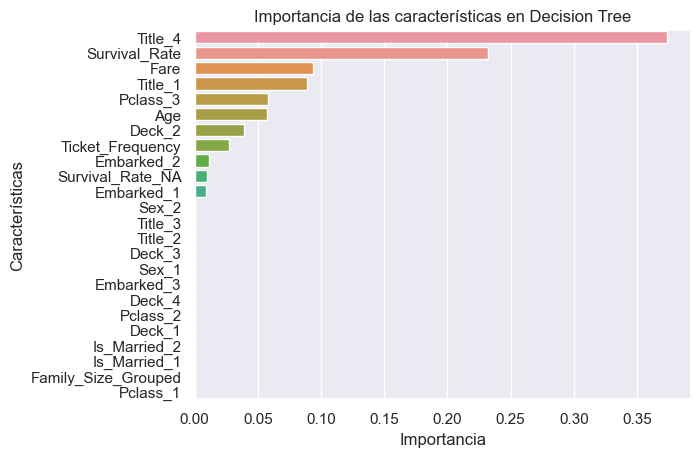

In [173]:
# Obtener la importancia de las caracteristicas en el modelo.
feature_importance = modelo.feature_importances_

# Crear un DataFrame para almacenar las características y sus importancias
importance_df = pd.DataFrame({'Feature': train.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras de la importancia de las características
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las características en Decision Tree')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [64]:
# Selección de índices de las características de mayor importancia
selec = importance_df[importance_df['Importance'] > 0.05] # Selección de índices con importancia > 0.05

# Selección de columnas de entrenamiento y prueba con las características de mayor importancia 
X_train = X_train[selec['Feature']]
X_test = X_test[selec['Feature']]
test = test[selec['Feature']]

### 5.2

In [174]:
# Crear el objeto RepeatedKFold para realizar la validación cruzada repetida, se divide en 3 partes y se repite 10 veces
rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=random_state)

In [175]:
# Definir el scorer de F1 para que funcione con cross_val_score
f1_scorer = make_scorer(f1_score, average='weighted')

In [176]:
#Creación de lista de clasificadores
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [177]:
def comparar_clasificadores(models, X, y, cv):
    cv_results = []
    for classifier in classifiers :
        cv_results.append(cross_val_score(classifier, X= X, y = y, scoring = f1_scorer, cv = rkf, n_jobs=-2))

    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","GaussianNB","AdaBoost",
    "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})
    return cv_res

In [107]:
def plotear_resultados(resultado, ancho, alto):
    
    plt.figure(figsize=(ancho,alto))
    g = sns.barplot(x="CrossValMeans",y="Algorithm",data = resultado, palette="Set3",orient = "h",**{'xerr':resultado['CrossValerrors']})
    g.set_xlabel("Mean F1 Score")
    g = g.set_title("Cross validation scores")
    
    # Agregar los valores de cada barra
    ax = g.axes
    for index, value in enumerate(resultado['CrossValMeans']):
        ax.annotate(f'{value:.4f}', xy=(value, index), color='black', va='center', ha='right')

    plt.show()

In [178]:
resultado = comparar_clasificadores(classifiers, X_train, y_train, rkf).sort_values(by='CrossValMeans', ascending=False)
resultado

,CrossValMeans,CrossValerrors,Algorithm
7,0.854239,0.021311,MultipleLayerPerceptron
9,0.851218,0.016342,LogisticRegression
10,0.848989,0.020372,LinearDiscriminantAnalysis
0,0.847471,0.019041,SVC
6,0.846969,0.018967,GradientBoosting
8,0.841339,0.020254,KNeighboors
4,0.840301,0.017247,RandomForest
5,0.826598,0.017472,ExtraTrees
3,0.819209,0.020433,AdaBoost
1,0.809108,0.020105,DecisionTree


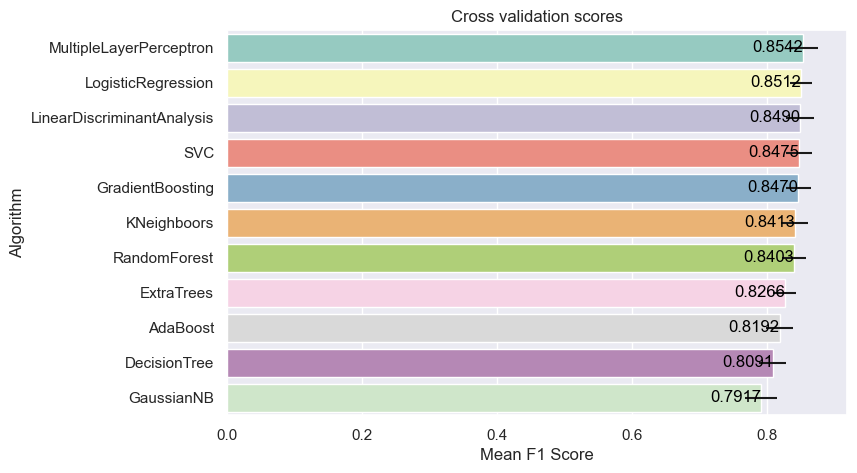

In [109]:
plotear_resultados(resultado, 8, 5)

Optimizar los modelos con mejor rendimiento

In [ ]:
# LDA

"""LDA_model = LinearDiscriminantAnalysis()
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(LDA_model, grid, scoring=f1_scorer, cv=rkf, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
"""

In [188]:
# LDA

# Crear una instancia del modelo LDA
LDA_model = LinearDiscriminantAnalysis()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'solver': ['lsqr', 'eigen', 'svd'],
    'shrinkage': [None, 'auto', 0.1, 0.2, 0.3]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(LDA_model, param_grid=param_grid, cv=10, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo LDA con los mejores hiperparámetros
best_LDA_model = LinearDiscriminantAnalysis(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_LDA_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = best_LDA_model.score(X_test, y_test)

print('Mean Accuracy: %.3f' % accuracy)
print('Config: %s' % best_params)

Mean Accuracy: 0.851
Config: {'shrinkage': None, 'solver': 'lsqr'}


              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       157
         1.0       0.84      0.79      0.81       111

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



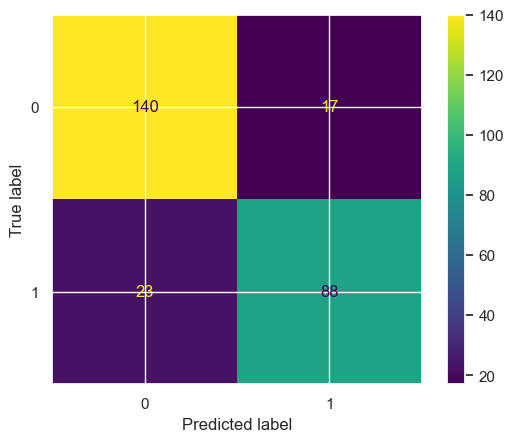

In [180]:
#predecir
y_estimado = best_LDA_model.predict(X_test)

#mostrar los resultados de la matriz de confusión.
cm = confusion_matrix(y_test, y_estimado)
print(classification_report(y_test, y_estimado))
disp = ConfusionMatrixDisplay(cm, display_labels=('0','1'))

disp.plot()
plt.show()

In [189]:
# Logistic Regression
log_reg_model = LogisticRegression(random_state=random_state)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores para el parámetro de regularización C
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solucionadores
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=10, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo de regresión logística con los mejores hiperparámetros
best_reg_model = LogisticRegression(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_reg_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = best_reg_model.score(X_test, y_test)

print('Mean Accuracy: %.3f' % accuracy)
print('Config: %s' % best_params)


Mean Accuracy: 0.832
Config: {'C': 10, 'solver': 'liblinear'}


In [204]:
# Create a GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=random_state)

# Define the parameter grid
param_grid = {'loss' : ['deviance'],
              'n_estimators' : [100, 500],
              'learning_rate': [0.01],
              'max_depth': [3, 5],
              'min_samples_leaf': [1],
              'max_features': ['sqrt'],
              'subsample': [0.5, 0.75, 1.0],
              #'min_samples_split': [2, 5, 10],
              'warm_start': [True, False],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid=param_grid, cv=5, scoring=f1_scorer, verbose=1)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo de regresión logística con los mejores hiperparámetros
best_gb_model = GradientBoostingClassifier(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_gb_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = best_gb_model.score(X_test, y_test)

print('Mean Accuracy: %.3f' % accuracy)
print('Config: %s' % best_params)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Mean Accuracy: 0.836
Config: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500, 'subsample': 1.0, 'warm_start': True}


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [115]:
# MLP
mlp_model = MLPClassifier(random_state=random_state)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(16,), (32,), (16, 16), (32, 16)],
    'activation': ['relu'],
    'alpha': [0.001],
    'solver': ['adam', 'lbfgs'],
    'batch_size': [16],
    'max_iter': [500],
    'early_stopping' : [True],
    'n_iter_no_change' : [10],
}
# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=rkf, scoring=f1_scorer)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo MLP con los mejores hiperparámetros
best_mlp_model = MLPClassifier(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_mlp_model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
accuracy = best_mlp_model.score(X_test, y_test)

# Imprimir los mejores hiperparámetros y la precisión del modelo
print("Mejores hiperparámetros:", best_params)
print(f"Precisión del MLP con mejores hiperparámetros: {accuracy:.3f}")


Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 16, 'early_stopping': True, 'hidden_layer_sizes': (32, 16), 'max_iter': 500, 'n_iter_no_change': 10, 'solver': 'adam'}
Precisión del MLP con mejores hiperparámetros: 0.84


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [116]:
# SVC
svc_model = SVC(probability= True)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'kernel': ['rbf'],
    'gamma': [ 0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100,200,300, 1000],
}
# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(svc_model,param_grid = param_grid, cv=rkf, scoring= f1_scorer, n_jobs= -2, verbose = 0)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo MLP con los mejores hiperparámetros
best_svc_model = SVC(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_svc_model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
accuracy = best_svc_model.score(X_test, y_test)

# Imprimir los mejores hiperparámetros y la precisión del modelo
print("Mejores hiperparámetros:", best_params)
print(f"Precisión del SVC con mejores hiperparámetros: {accuracy:.2f}")
    

Mejores hiperparámetros: {'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}
Precisión del SVC con mejores hiperparámetros: 0.84


Plot de curvas de aprendizaje

In [83]:
#Función para graficar la curva de aprendizaje, obtenida de la documentación de sklearn, se modificó el score para que sea f1
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                        scoring=f1_scorer,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

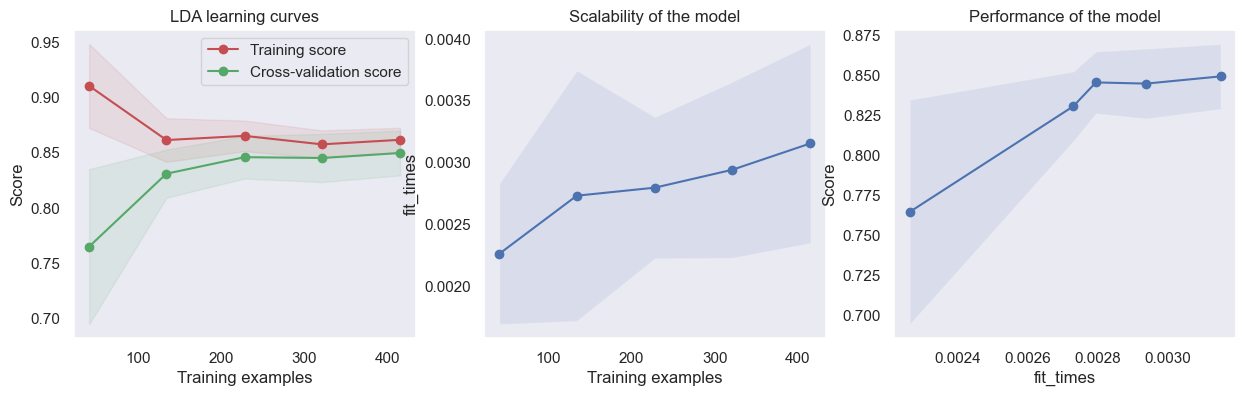

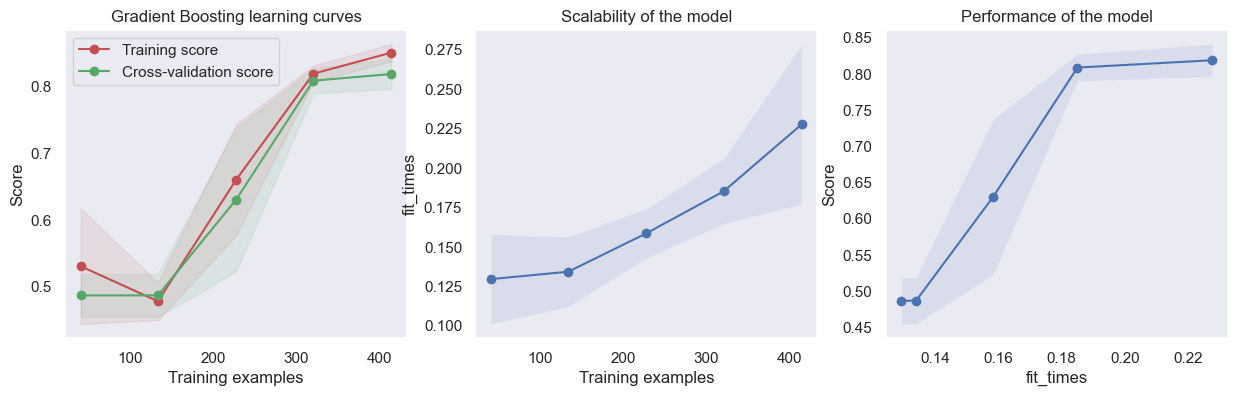

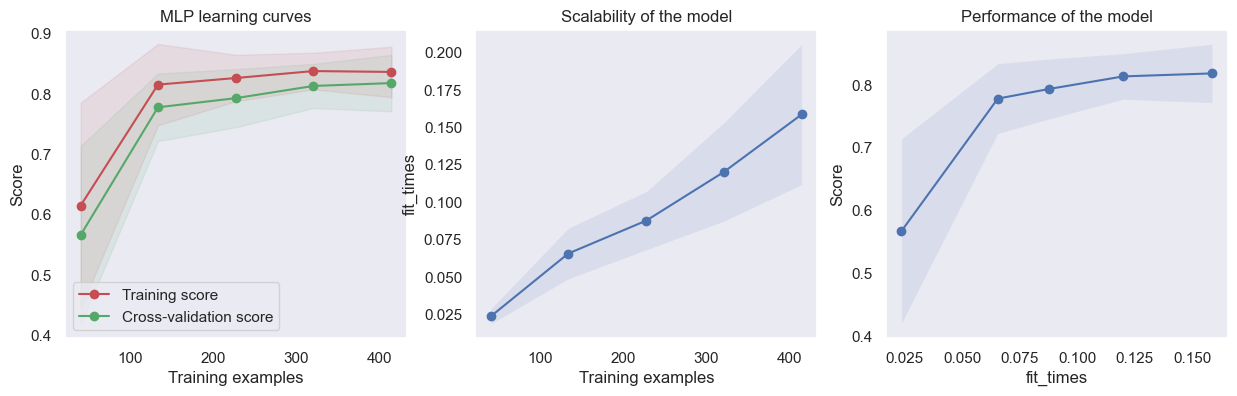

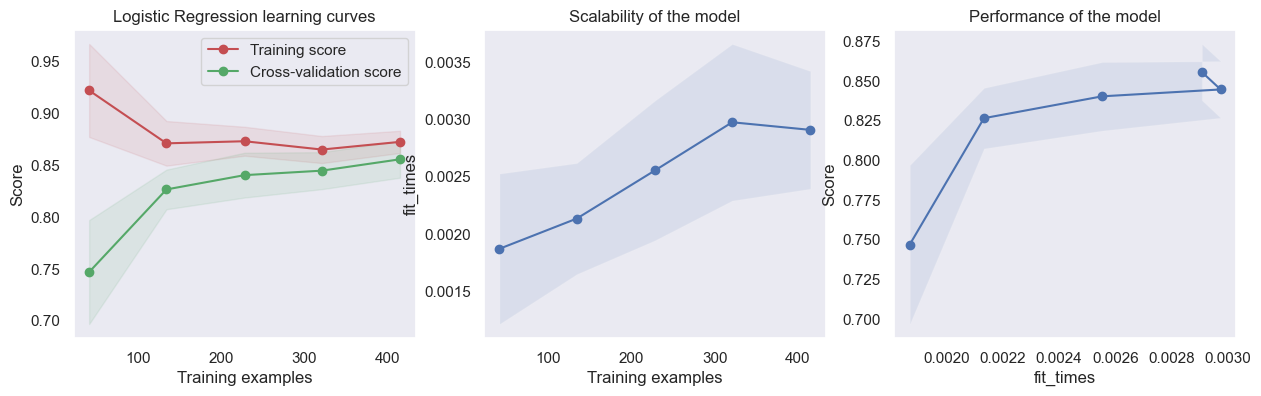

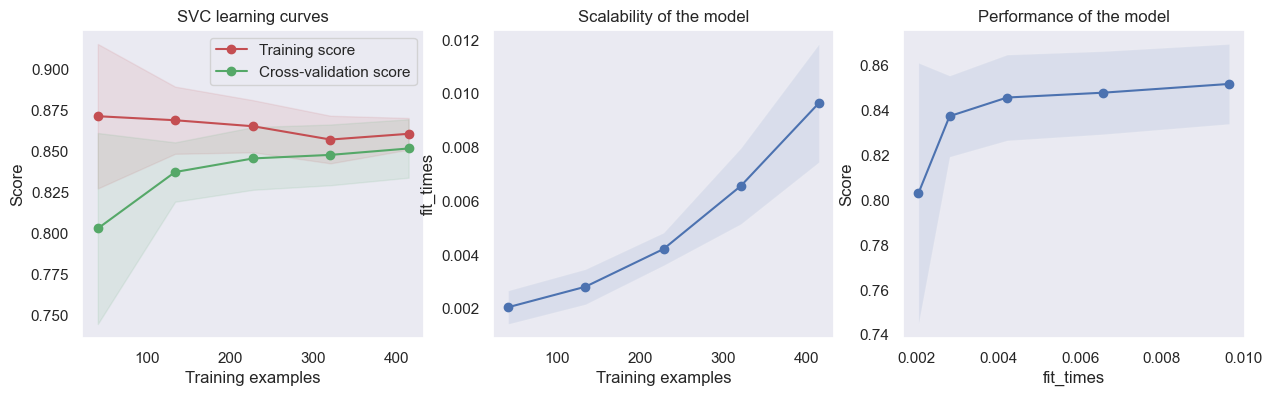

In [117]:
g = plot_learning_curve(best_LDA_model,'LDA learning curves',X_train,y_train,cv=rkf) 
g = plot_learning_curve(best_gb_model,'Gradient Boosting learning curves',X_train,y_train,cv=rkf)
g = plot_learning_curve(best_mlp_model,'MLP learning curves',X_train,y_train,cv=rkf)
g = plot_learning_curve(best_reg_model,'Logistic Regression learning curves',X_train,y_train,cv=rkf)
g = plot_learning_curve(best_svc_model,'SVC learning curves',X_train,y_train,cv=rkf)

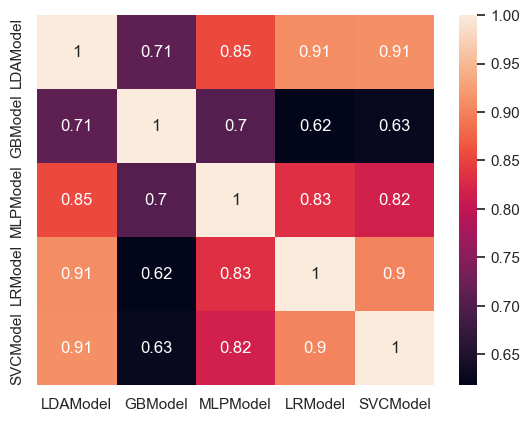

In [121]:
test_Survived_LDA = pd.Series(best_LDA_model.predict(test), name="LDAModel")
test_Survived_GB = pd.Series(best_gb_model.predict(test), name="GBModel")
test_Survided_MLP = pd.Series(best_mlp_model.predict(test), name="MLPModel")
test_Survived_LR = pd.Series(best_reg_model.predict(test), name="LRModel")
test_Survived_SVC = pd.Series(best_svc_model.predict(test), name="SVCModel")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_LDA,test_Survived_GB,test_Survided_MLP,test_Survived_LR,test_Survived_SVC],axis=1)

g = sns.heatmap(ensemble_results.corr(),annot=True)

In [122]:
# Ensamble de modelos
votingC = VotingClassifier(estimators=[('lda', best_LDA_model), ('gb', best_gb_model),
('mlp', best_mlp_model), ('lr', best_reg_model), ('svc', best_svc_model)], voting='hard', n_jobs=-2)

votingC = votingC.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
accuracy = votingC.score(X_test, y_test)

# Imprimir los mejores hiperparámetros y la precisión del modelo
print(f"Precisión del ensamble de modelos: {accuracy:.2f}")

Precisión del ensamble de modelos: 0.85


              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       157
         1.0       0.84      0.79      0.81       111

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



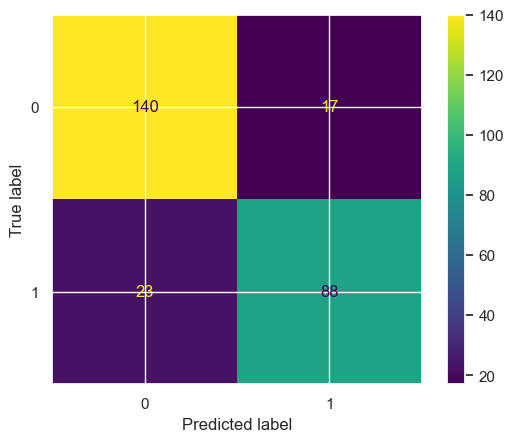

In [123]:
#predecir
y_estimado = votingC.predict(X_test)

#mostrar los resultados de la matriz de confusión.
cm = confusion_matrix(y_test, y_estimado)
print(classification_report(y_test, y_estimado))
disp = ConfusionMatrixDisplay(cm, display_labels=('0','1'))

disp.plot()
plt.show()

In [124]:
# Predicción para el conjunto test
y_pred = pd.DataFrame(votingC.predict(test).astype(int))
columnas = ['Survived']
y_pred.columns = columnas

# Generar archivo csv para subir a Kaggle
test_data = pd.read_csv('./test.csv')
id = pd.DataFrame(test_data['PassengerId'])

predic = pd.concat([id, y_pred], axis=1)

predic.to_csv('predic_20230925_2.csv', index=False)

In [125]:
predic.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0
